# Keras图片增强

CNN中图片具有平移不变形，旋转不变形,如下图，因此我们可以通过增强数据，扩展训练集。

![](./cnn600.png)

我们可以对现有的数据，如图片数据进行平移、翻转、旋转、缩放、亮度增强等操作，以生成新的图片来参与训练或测试。

这种操作可以将图片数量提升数倍，由此大大降低了过拟合的可能,因为模型训练了更多的图片，有更好的泛化。

实际上经验，图像增强中使用旋转、翻转，效果不错；

https://keras.io/preprocessing/image/ 

https://keras-cn.readthedocs.io/en/latest/preprocessing/image/

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

Keras中数据增强的类：ImageDataGenerator

```python
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=K.image_data_format())
```

## 参数

**featurewise_center**：布尔值，使输入数据集去中心化（均值为0）, 按feature执行

**samplewise_center**：布尔值，使输入数据的每个样本均值为0

**featurewise_std_normalization**：布尔值，将输入除以数据集的标准差以完成标准化, 按feature执行

**samplewise_std_normalization**：布尔值，将输入的每个样本除以其自身的标准差

**zca_whitening**：布尔值，对输入数据施加ZCA白化

**zca_epsilon**: ZCA使用的eposilon，默认1e-6

**rotation_range**：整数，数据提升时图片随机转动的角度

**width_shift_range**：浮点数，图片宽度的某个比例，数据提升时图片水平偏移的幅度

**height_shift_range**：浮点数，图片高度的某个比例，数据提升时图片竖直偏移的幅度

**shear_range**：浮点数，剪切强度（逆时针方向的剪切变换角度）

**zoom_range**：浮点数或形如[lower,upper]的列表，随机缩放的幅度，若为浮点数，则相当于[lower,upper] = [1 - zoom_range, 1+zoom_range]

**channel_shift_range**：浮点数，随机通道偏移的幅度

**fill_mode**：；‘constant’，‘nearest’，‘reflect’或‘wrap’之一，当进行变换时超出边界的点将根据本参数给定的方法进行处理

**cval**：浮点数或整数，当fill_mode=constant时，指定要向超出边界的点填充的值

**horizontal_flip**：布尔值，进行随机水平翻转

**vertical_flip**：布尔值，进行随机竖直翻转

**rescale**: 重放缩因子,默认为None. 如果为None或0则不进行放缩,否则会将该数值乘到数据上(在应用其他变换之前)

**preprocessing_function**: 将被应用于每个输入的函数。该函数将在图片缩放和数据提升之后运行。该函数接受一个参数，为一张图片（秩为3的numpy array），并且输出一个具有相同shape的numpy array

**data_format**：字符串，“channel_first”或“channel_last”之一，代表图像的通道维的位置。该参数是Keras 1.x中的image_dim_ordering，“channel_last”对应原本的“tf”，“channel_first”对应原本的“th”。以128x128的RGB图像为例，“channel_first”应将数据组织为（3,128,128），而“channel_last”应将数据组织为（128,128,3）。该参数的默认值是~/.keras/keras.json中设置的值，若从未设置过，则为“channel_last”

## 方法
**fit(x, augment=False, rounds=1)：**计算依赖于数据的变换所需要的统计信息(均值方差等),只有使用featurewise_center，featurewise_std_normalization或zca_whitening时需要此函数。

**X**：numpy array，样本数据，秩应为4.在黑白图像的情况下channel轴的值为1，在彩色图像情况下值为3

**augment**：布尔值，确定是否使用随即提升过的数据

**round**：若设augment=True，确定要在数据上进行多少轮数据提升，默认值为1

**seed**: 整数,随机数种子

**flow(self, X, y, batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png')**：接收numpy数组和标签为参数,生成经过数据提升或标准化后的batch数据,并在一个无限循环中不断的返回batch数据

**x**：样本数据，秩应为4.在黑白图像的情况下channel轴的值为1，在彩色图像情况下值为3

**y**：标签

**batch_size**：整数，默认32

**shuffle**：布尔值，是否随机打乱数据，默认为True

**save_to_dir：None**或字符串，该参数能让你将提升后的图片保存起来，用以可视化

**save_prefix**：字符串，保存提升后图片时使用的前缀, 仅当设置了save_to_dir时生效

**save_format**："png"或"jpeg"之一，指定保存图片的数据格式,默认"jpeg"

**yields**:形如(x,y)的tuple,x是代表图像数据的numpy数组.y是代表标签的numpy数组.该迭代器无限循环.

**seed**: 整数,随机数种子

**flow_from_directory**(directory): 以文件夹路径为参数,生成经过数据提升/归一化后的数据,在一个无限循环中无限产生batch数据

**directory**: 目标文件夹路径,对于每一个类,该文件夹都要包含一个子文件夹.子文件夹中任何JPG、PNG、BNP、PPM的图片都会被生成器使用.详情请查看此脚本

**target_size**: 整数tuple,默认为(256, 256). 图像将被resize成该尺寸

**color_mode**: 颜色模式,为"grayscale","rgb"之一,默认为"rgb".代表这些图片是否会被转换为单通道或三通道的图片.

**classes**: 可选参数,为子文件夹的列表,如['dogs','cats']默认为None. 若未提供,则该类别列表将从directory下的子文件夹名称/结构自动推断。每一个子文件夹都会被认为是一个新的类。(类别的顺序将按照字母表顺序映射到标签值)。通过属性class_indices可获得文件夹名与类的序号的对应字典。

**class_mode**: "categorical", "binary", "sparse"或None之一. 默认为"categorical. 该参数决定了返回的标签数组的形式, "categorical"会返回2D的one-hot编码标签,"binary"返回1D的二值标签."sparse"返回1D的整数标签,如果为None则不返回任何标签, 生成器将仅仅生成batch数据, 这种情况在使用
model.predict_generator()和model.evaluate_generator()等函数时会用到.

**batch_size**: batch数据的大小,默认32

**shuffle**: 是否打乱数据,默认为True

**seed**: 可选参数,打乱数据和进行变换时的随机数种子

**save_to_dir**: None或字符串，该参数能让你将提升后的图片保存起来，用以可视化

**save_prefix**：字符串，保存提升后图片时使用的前缀, 仅当设置了save_to_dir时生效

**save_format**："png"或"jpeg"之一，指定保存图片的数据格式,默认"jpeg"

**flollow_links**: 是否访问子文件夹中的软链接

# 1.ImageDataGenerator数据增强方法

In [125]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from PIL import Image
import numpy as np
from keras.preprocessing import image
import keras as K

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x399 at 0x7F0E848CAD30>
(399, 640, 3)


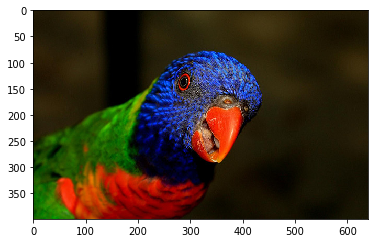

In [126]:
# load the image
img = image.load_img('bird.jpg')
print(img)
# convert to numpy array
data = image.img_to_array(img)
print(data.shape)

pyplot.imshow(img)

In [127]:
# expand dimension to one sample
samples = expand_dims(data, 0)
print(samples.shape)

(1, 399, 640, 3)


## 1.1 随机平移

移动范围可以用像素点，也可以用0~1浮点数，表示移动比例

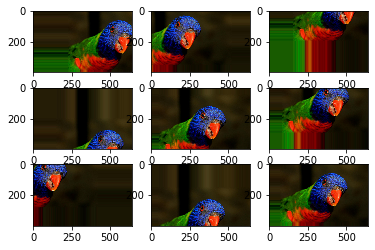

In [128]:
# create image data augmentation generator
#datagen = ImageDataGenerator(width_shift_range=[-200,200])
datagen = ImageDataGenerator(width_shift_range=0.5,height_shift_range=0.5)

# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
pyplot.show()

## 1.2 水平或垂直翻转

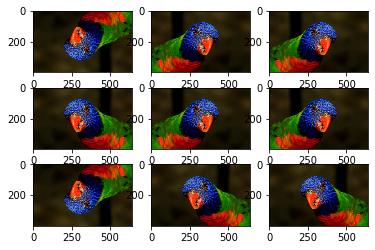

In [129]:
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)

# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
pyplot.show()

## 1.3 随机旋转

参数为最大旋转角度

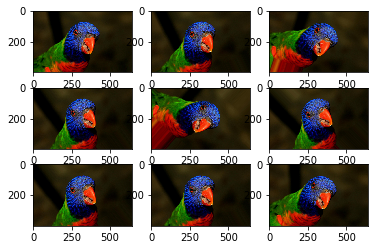

In [130]:
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=45)

# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
pyplot.show()

## 1.4 随机亮度变化

小于1.0表示变暗，大于1.0变亮，1.0不变

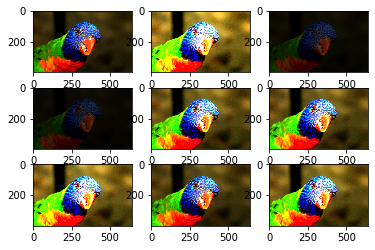

In [131]:
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,5.0])

# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
pyplot.show()

## 1.5 随机变焦

参数表示缩小，放大的最大范围

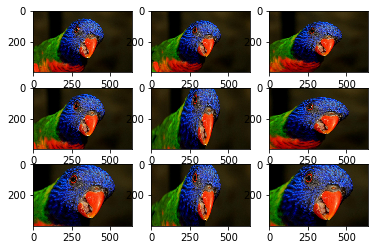

In [132]:
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])

# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
pyplot.show()

# 2 在训练中运用数据增强的实际场景

1.图片来源于已知数据集，如mnist;

2.图片来源于普通图片，如本地的jpg,png等；

3.图片来源于panda数据集；

## 2.1 数据来源已知数据集，操作方法如下：

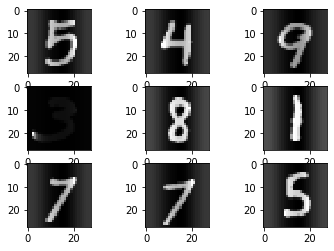

In [133]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K

#K.set_image_dim_ordering('th')

(train_data, train_label), (test_data, test_label) = mnist.load_data()
train_data = train_data.reshape(train_data.shape[0], 1, 28, 28)
train_data = train_data.astype('float32')

# 创建图像生成器，指定对图像操作的内容，允许图片标准化处理
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# 图像生成器要训练的数据,计算均值，方差等
datagen.fit(train_data)

# 这是个图像生成迭代器，是可以无限生成各种新图片，我们指定每轮迭代只生成9张图片
for batch_data, batch_label in datagen.flow(train_data, train_label, batch_size=9):
    for i in range(0, 9):
        # 创建一个 3*3的九宫格，以显示图片
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(batch_data[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break

## 2.2数据来源图片集，其操作方法如下：

这种类型在实际训练中更常见，这里举两个类型例子

In [134]:
batch_size = 32
# 迭代50次
epochs = 50
# 依照模型规定，图片大小被设定为224
IMAGE_SIZE = 224

TRAIN_PATH = './data/17flowerclasses/train'
TEST_PATH = './data/17flowerclasses/test'

FLOWER_CLASSES = ['Bluebell', 'ButterCup', 'ColtsFoot', 'Cowslip', 'Crocus', 'Daffodil', 'Daisy','Dandelion', 'Fritillary', 'Iris', 'LilyValley', 'Pansy', 'Snowdrop', 'Sunflower','Tigerlily', 'tulip', 'WindFlower']

# 使用数据增强
train_datagen = ImageDataGenerator(rotation_range=90)
# 可指定输出图片大小，因为深度学习要求训练图片大小保持一致
train_generator = train_datagen.flow_from_directory(directory=TRAIN_PATH,
                                                        target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                        classes=FLOWER_CLASSES)
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(directory=TEST_PATH, 
                                                      target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                      classes=FLOWER_CLASSES)
 # 运行模型
history = model.fit_generator(train_generator, epochs=epochs, validation_data=test_generator)

Found 14 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


NameError: name 'model' is not defined

In [ ]:
需要说明的是，这些增强图片都是在内存中实时批量迭代生成的，不是一次性被读入内存，这样可以极大地节约内存空间，加快处理速度。若想保留中间过程生成的增强图片，可以在上述方法中添加保存路径等参数，此处不再赘述。
batch_size = 32
# 迭代50次
epochs = 50
# 依照模型规定，图片大小被设定为224
IMAGE_SIZE = 224

TRAIN_PATH = './data/17flowerclasses/train'
TEST_PATH = './data/17flowerclasses/test'

FLOWER_CLASSES = ['Bluebell', 'ButterCup', 'ColtsFoot']

# 使用数据增强
train_datagen = ImageDataGenerator(rotation_range=90)
# 可指定输出图片大小，因为深度学习要求训练图片大小保持一致
train_generator = train_datagen.flow_from_directory(directory=TRAIN_PATH,
                                                        target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                        classes=FLOWER_CLASSES)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
 
gener=datagen.flow_from_directory(r'./data/17flowerclasses/train',#类别子文件夹的上一级文件夹
                                         batch_size=8,
                                         shuffle=False,
                                         save_to_dir=r'./train_result',
                                         save_prefix='trans_',
                                         save_format='jpg')
for i in range(1):
    gener.next()